In [157]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
data = pd.read_excel('data.xls', sheet = '1.objetos')

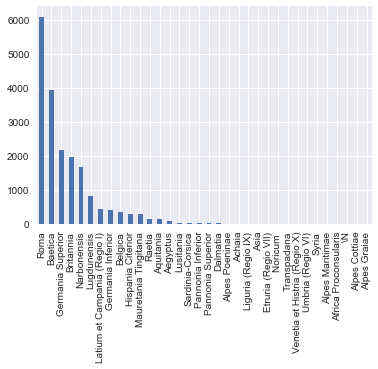

In [159]:
data.Provincia.value_counts().plot(kind = 'bar')

In [235]:
# Get rid of provinces that appear less than 20 times

value_counts = data['Provincia'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= 20].index
data_small = data[~data.Provincia.isin(to_remove)]

print(data_small.Provincia.value_counts())

Roma                            6097
Baetica                         3929
Germania Superior               2183
Britannia                       1985
Narbonensis                     1662
Lugdunensis                      811
Latium et Campania (Regio I)     438
Germania Inferior                411
Belgica                          359
Hispania Citerior                294
Mauretania Tingitana             288
Raetia                           141
Aquitania                        140
Aegyptus                          74
Name: Provincia, dtype: int64


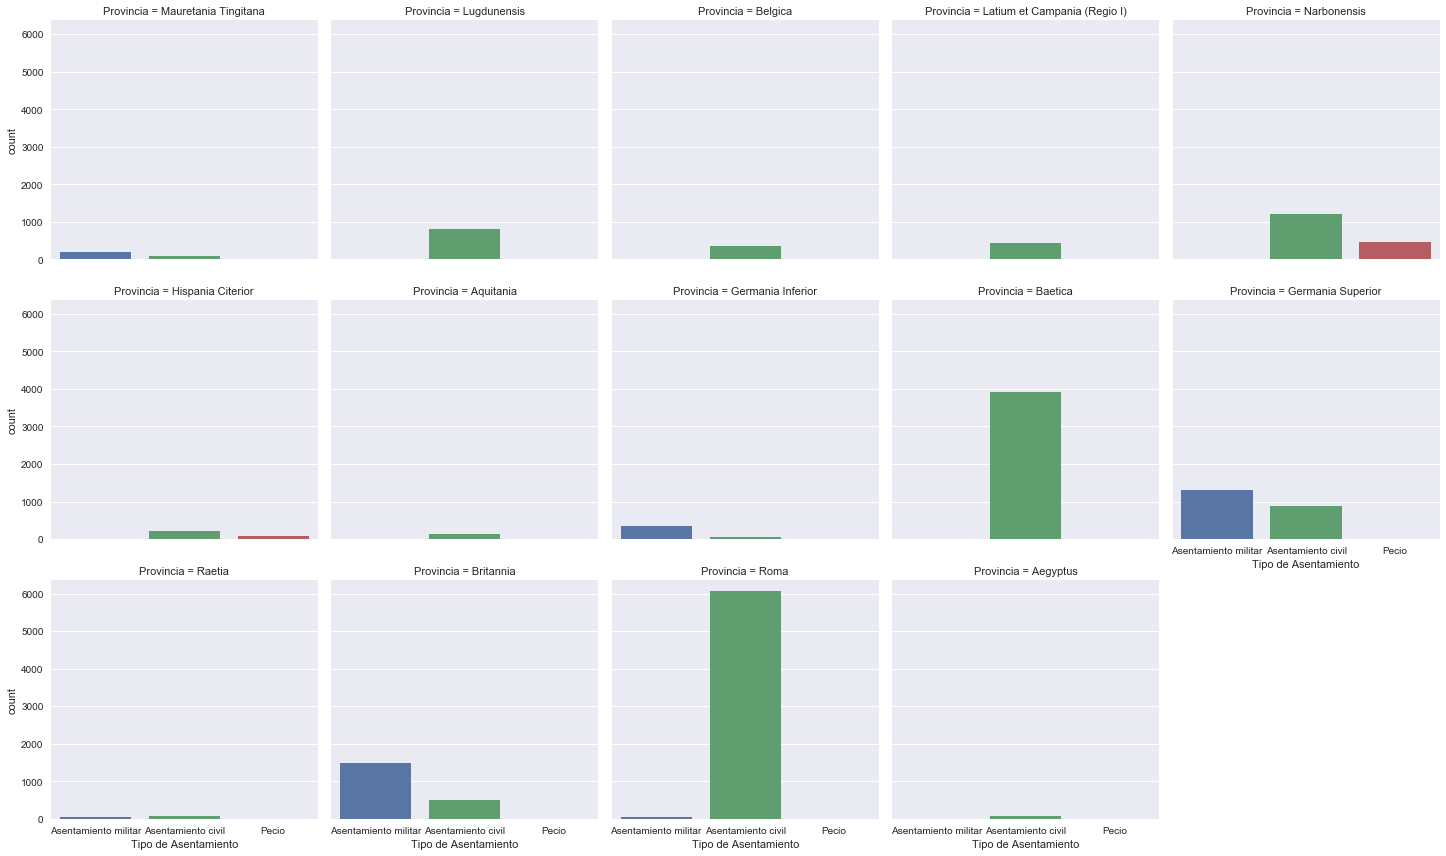

In [172]:
sns.factorplot(x = 'Tipo de Asentamiento', kind = 'count', data=data, col = 'Provincia', col_wrap=5)

In [173]:
df_north = data[data.Provincia.isin(['Belgica', 'Germania Superior', 'Germania Inferior', 'Britannia'])]

In [174]:
df_north.Provincia.value_counts()

Germania Superior    2183
Britannia            1985
Germania Inferior     411
Belgica               359
Name: Provincia, dtype: int64

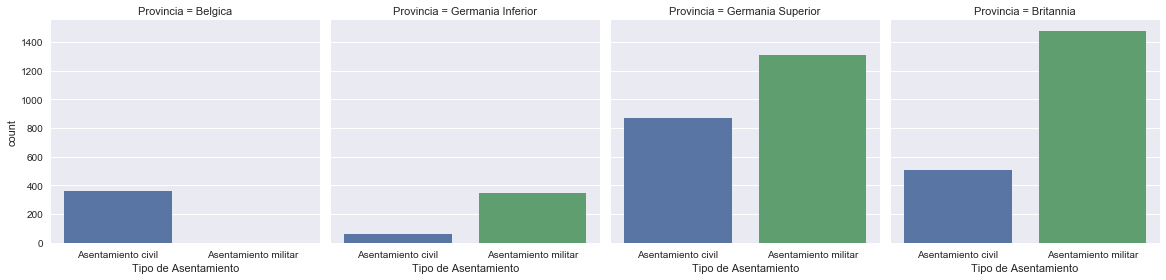

In [175]:
sns.factorplot(x = 'Tipo de Asentamiento', kind = 'count', data=df_north, col = 'Provincia', col_wrap=5)

In [236]:
n_sol = {'ca. 500/1000':'small', 'ca. 1000':'small', 'ca. 500':'small', 'ca. 500 ':'small',
       'ca. 5500/10000':'medium', 'ca. 5500':'medium', 'ca. 10000':'large', 'ca. 6000/12000 ':'large',
       'ca. 9000/11000 ':'large', 'ca. 5500/6000':'medium', 'ca. 11000/16000 ':'large', 'ca. 5000':'medium',
       'ca.5500/6000':'medium', 'ca. 6000':'medium'}

data_small['Número de soldados_cat']=data_small['Número de soldados'].map(n_sol)


C:\Users\iromanow\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



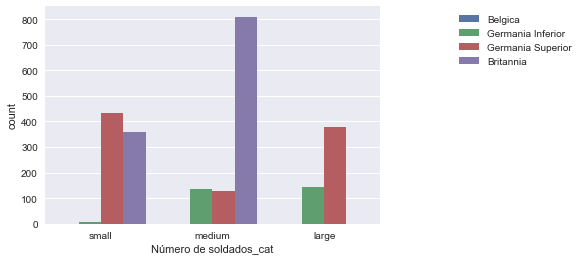

In [239]:
sns.countplot(x='Número de soldados_cat', data = data_small[data_small.Provincia.isin(['Belgica', 'Germania Superior', 'Germania Inferior', 'Britannia'])], hue = 'Provincia')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))

In [251]:
data_small[data_small.Provincia.isin(['Belgica', 'Germania Superior', 'Germania Inferior', 'Britannia'])].groupby(['Provincia','Número de soldados_cat']).count()

ID Number  Tipología Anf.  \
Provincia         Número de soldados_cat                              
Britannia         medium                        810             810   
                  small                         359             359   
Germania Inferior large                         143             143   
                  medium                        135             135   
                  small                           8               8   
Germania Superior large                         379             379   
                  medium                        128             128   
                  small                         432             432   

                                          Tipo de Provincia  Rango Provincia  \
Provincia         Número de soldados_cat                                       
Britannia         medium                                810              810   
                  small                                 359              359   
Germania Inferior large                                 143              143   
                  medium                                135              135   
                  small                                   8                8   
Germania Superior large                                 379              379   
                  medium                                128              128   
                  small                                 432              432   

                                          Pais Moderno  GIS LH  \
Provincia         Número de soldados_cat                         
Britannia         medium                           810     810   
                  small                            359     359   
Germania Inferior large                            143     143   
                  medium                           135     135   
                  small                              8       8   
Germania Superior large                            379     379   
                  medium                           128     128   
                  small                            432     432   

                                          Tipo de Asentamiento  \
Provincia         Número de soldados_cat                         
Britannia         medium                                   810   
                  small                                    359   
Germania Inferior large                                    143   
                  medium                                   135   
                  small                                      8   
Germania Superior large                                    379   
                  medium                                   128   
                  small                                    432   

                                          Datación Pecios   LH  LHE  \
Provincia         Número de soldados_cat                              
Britannia         medium                                0  810  810   
                  small                                 0  359  359   
Germania Inferior large                                 0  143  142   
                  medium                                0  135  135   
                  small                                 0    8    8   
Germania Superior large                                 0  379  378   
                  medium                                0  128  128   
                  small                                 0  432  432   

                                            ...      \
Provincia         Número de soldados_cat    ...       
Britannia         medium                    ...       
                  small                     ...       
Germania Inferior large                     ...       
                  medium                    ...       
                  small                     ...       
Germania Superior large                     ...       
                  medium                    ...       
  

In [156]:
'''import plotly
plotly.tools.set_credentials_file(username='izoken@gmail.com', api_key='846eKsoMLxYnGL0VlnIL')
plotly.offline.init_notebook_mode(connected=True)
import plotly.plotly as py

countries = pd.read_excel('codes2.xlsx')

countries = (dict(zip(countries['Alpha-2 code'].str.lstrip(), countries['Alpha-3 code'].str.lstrip())))
df_north['CODE']=df_north['Pais Moderno'].map(countries)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
data = [ dict(
        type = 'choropleth',
        locations = df_north['CODE'],
        z = df_north['Número de soldados'],
        text = df_north['Pais Moderno'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        lonaxis = dict( range= [ -10.0, 45.0 ] ),
        lataxis = dict( range= [ 30.0, 66.0 ] ),
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )'''

'import plotly\nplotly.tools.set_credentials_file(username=\'izoken@gmail.com\', api_key=\'846eKsoMLxYnGL0VlnIL\')\nplotly.offline.init_notebook_mode(connected=True)\nimport plotly.plotly as py\n\ndf = pd.read_csv(\'https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv\')\ndata = [ dict(\n        type = \'choropleth\',\n        locations = df_north[\'CODE\'],\n        z = df_north[\'Número de soldados\'],\n        text = df_north[\'Pais Moderno\'],\n        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],\n        autocolorscale = False,\n        reversescale = True,\n        marker = dict(\n            line = dict (\n                color = \'rgb(180,180,180)\',\n                width = 0.5\n            ) ),\n        colorbar = dict(\n            autotick = False,\n            tickprefix = \'$\',\n            title = \'GDP<